In [1]:
import pandas as pd
import json
import folium

In [6]:
total_pop = json.load(open("4.오산시_연령별_거주인구격자(총인구).geojson",encoding='utf-8'))

In [11]:
total_pop.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [15]:
total_pop['features']

[{'type': 'Feature',
  'properties': {'gid': '다사551085', 'val': None},
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[126.99421564681425, 37.17418235770403],
      [126.99420963816323, 37.17508373885349],
      [126.99533608014656, 37.175088541741566],
      [126.99534207541716, 37.174187160436155],
      [126.99421564681425, 37.17418235770403]]]]}},
 {'type': 'Feature',
  'properties': {'gid': '다사551086', 'val': None},
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[126.99420963816323, 37.17508373885349],
      [126.99420362924478, 37.17598511986466],
      [126.99533008460917, 37.17598992290871],
      [126.99533608014656, 37.175088541741566],
      [126.99420963816323, 37.17508373885349]]]]}},
 {'type': 'Feature',
  'properties': {'gid': '다사551087', 'val': None},
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[126.99420362924478, 37.17598511986466],
      [126.9941976200589, 37.17688650073755],
      [126.9953240888049, 37.176891303937566],
  

In [16]:
sgg = json.load(open("seoul.geojson",encoding='utf-8'))

In [17]:
sgg

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'SIG_CD': '11320',
    'SIG_KOR_NM': '도봉구',
    'SIG_ENG_NM': 'Dobong-gu',
    'ESRI_PK': 0,
    'SHAPE_AREA': 0.00210990544544,
    'SHAPE_LEN': 0.239901251347},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.019851357, 37.70088490199998],
      [127.02217147700003, 37.69960736799999],
      [127.02341184299996, 37.69995983299998],
      [127.02533791899998, 37.69948105499998],
      [127.02692041600005, 37.70015310500003],
      [127.02704481599994, 37.70101150699998],
      [127.02771004600004, 37.70083744700003],
      [127.02823835, 37.700188083],
      [127.02833534499996, 37.70006885100003],
      [127.02901307699995, 37.69957318899998],
      [127.02930740500005, 37.699210467],
      [127.02962280199995, 37.69810365199999],
      [127.02967567200005, 37.69773805400001],
      [127.02975002699998, 37.

# Code in use

In [33]:
import pandas as pd
import numpy as np
import json
import folium
import seaborn as sns
sns.set()

In [2]:
kid_protect = pd.read_csv("9.오산시_어린이보호구역.csv")

In [3]:
kid_protect.head(2)

시설종류     시설명 CCTV설치여부  CCTV설치대수  보호구역도로폭     보호구역_경도    보호구역_위도
0  특수학교    성심학교        N         0       25  127.017521  37.176762
1  초등학교  가수초등학교        Y         1       12  127.047957  37.148103

In [4]:
kid_protect.shape

(91, 7)

In [37]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [5]:
kid_protect['시설종류'].value_counts()

어린이집    48
초등학교    25
유치원     17
특수학교     1
Name: 시설종류, dtype: int64

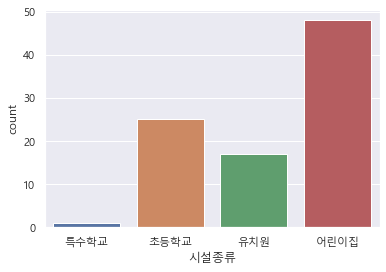

In [38]:
sns.countplot(x='시설종류',data=kid_protect)

In [6]:
for line in kid_protect.iloc:
    print(line.values.tolist(),type(line.values),len(line.values))
    break

['특수학교', '성심학교', 'N', 0, 25, 127.01752140000002, 37.176761799999994] <class 'numpy.ndarray'> 7


In [24]:
center =[37.15222, 127.07056]
zoom =13

types = kid_protect['시설종류'].unique().tolist()

colors=['white','blue','green','red']

m = folium.Map(location=center, zoom_start=zoom)

for place in kid_protect.iloc:
    type_ , name , has_cctv , num_cctv , road_width , longitude , latitude = place.values.tolist()
    idx = types.index(type_)

    folium.Marker(
      location=[latitude,longitude],
      popup=name,
      icon=folium.Icon(color=colors[idx],icon='child',prefix="fa")
    ).add_to(m)

m

In [14]:
hakwon = pd.read_csv("30.오산시_학원 및 교습소 현황.csv")

In [15]:
hakwon.head(2)

업종구분명 교습과정명     시설위치_경도    시설위치_위도
0   교습소    음악  127.048919  37.146279
1   교습소    미술  127.048919  37.146279

In [21]:
hakwon['업종구분명'].value_counts()

학교교과교습학원    1590
평생직업교육학원     106
교습소           90
Name: 업종구분명, dtype: int64

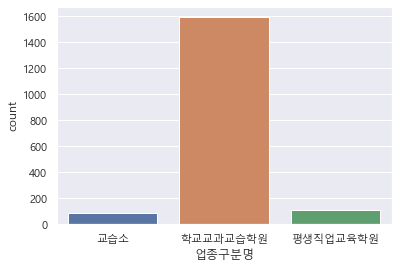

In [39]:
sns.countplot(x='업종구분명',data=hakwon)

In [22]:
hakwon['교습과정명'].value_counts()

보습             34
음악             30
수학(고등)         23
미술             21
수학(중등)         18
               ..
영어/Writing      1
중국어(고급)         1
자격증/워드프로세서      1
피아노바이엘(주5일)     1
New시매쓰          1
Name: 교습과정명, Length: 1120, dtype: int64

In [35]:
for place in hakwon.iloc:
    type_ , name , longitude , latitude = place.values.tolist()
    
    if type(name) == type(np.nan):
        name=""
    
    folium.CircleMarker(
      [latitude,longitude],
      radius=5,
      color='#ffffgg',
      fill_color='#fffggg',
      popup=name+" "+type_
    ).add_to(m)
    
m